### Constructing Lenet in keras

##### Loading and preparing MNIST data

In [52]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Activation,ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.datasets import mnist
import keras
from keras.utils import np_utils
from keras.optimizers import Adadelta,Adam

In [53]:
#Load the mnist dataset
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#Stroring then number of roes and columns
img_rows = X_train[0].shape[0]
img_cols = X_train[0].shape[1]


# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)

X_train = X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test = X_test.reshape(X_test.shape[0],img_rows,img_cols,1)

#Shape of single image will be
input_shape = (img_rows,img_cols,1)

# changing our image type to float32 data type
X_train = X_train.astype('float32')
x_test = X_test.astype('float32')

#Normalising 
X_train = X_train/255
X_test = X_test/255

#Now one hot encoding labels

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


#identifying shapes and sizes
print("Size of X_train",X_train.shape)
print("Size of X_test",X_test.shape)
print("Size of y_train",y_train.shape)
print("Size of y_test",y_test.shape)


num_classes = y_test.shape[1]
num_pixels = y_train.shape[1]*X_train.shape[2]

print("Num of classes",num_classes)
print("Num of pixeles",num_pixels)

Size of X_train (60000, 28, 28, 1)
Size of X_test (10000, 28, 28, 1)
Size of y_train (60000, 10)
Size of y_test (10000, 10)
Num of classes 10
Num of pixeles 280


### Now creating our model

In [56]:
model = Sequential()

#2 sets of CRP
model.add(Conv2D(20,(5,5),padding='same',input_shape = input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(50,(5,5),padding='same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))


#FUlly connnected layer
model.add(Flatten())
model.add(Dense(500,activation='relu'))
#Softmax for classification
model.add(Dense(num_classes,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.001),metrics=['accuracy'])








### training Lnet on mnist dataset

In [57]:
batch_size = 128
epochs = 10

history = model.fit(X_train,y_train,
                   epochs=epochs,
                   batch_size=batch_size,
                   verbose=1,
                    shuffle=True,
                   validation_data=(X_test,y_test))

Epoch 1/10
469/469 [==============================] - 11s 21ms/step - loss: 0.3801 - accuracy: 0.8837 - val_loss: 0.0499 - val_accuracy: 0.9842
Epoch 2/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0473 - accuracy: 0.9858 - val_loss: 0.0330 - val_accuracy: 0.9898
Epoch 3/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0286 - accuracy: 0.9915 - val_loss: 0.0262 - val_accuracy: 0.9907
Epoch 4/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0196 - accuracy: 0.9939 - val_loss: 0.0248 - val_accuracy: 0.9915
Epoch 5/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0146 - accuracy: 0.9959 - val_loss: 0.0254 - val_accuracy: 0.9915
Epoch 6/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0129 - accuracy: 0.9955 - val_loss: 0.0235 - val_accuracy: 0.9924
Epoch 7/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0099 - accuracy: 0.9964 - val_loss: 0.0267 - val_accuracy:

###  Plotting our graph

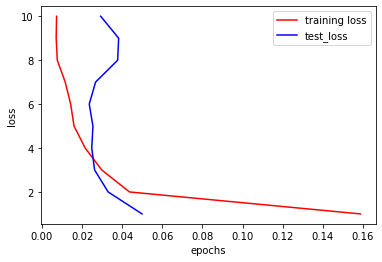

In [59]:
from matplotlib import pyplot as plt

train_loss = history.history['loss']
test_loss = history.history['val_loss']
epochs = range(1,len(train_loss)+1)
plt.plot(train_loss,epochs,'r',label = 'training loss')
plt.plot(test_loss,epochs,'b',label='test_loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

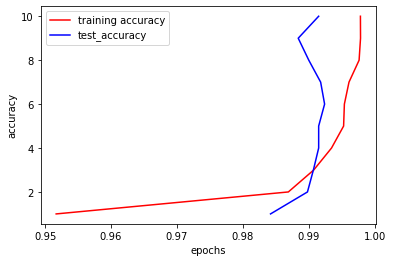

In [63]:
from matplotlib import pyplot as plt

train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
epochs = range(1,len(train_accuracy)+1)
plt.plot(train_accuracy,epochs,'r',label = 'training accuracy')
plt.plot(test_accuracy,epochs,'b',label='test_accuracy')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
!git add LeNet_Mnist.ipynb
! git commit -m "19:05/02-05-2021"
! git push origin main